In [1]:
# Demanding Prediction with LSTM
import pandas as pd
import numpy as np
import tensorflow as tf

In [4]:
df = pd.read_csv("data\london_merged.csv",
                parse_dates=['timestamp'],
                index_col="timestamp")

In [5]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [6]:
df.shape

(17414, 9)

In [7]:
df["hour"] = df.index.hour
df['day_month'] = df.index.day
df["day_week"] = df.index.dayofweek
df["month"] = df.index.month

In [8]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_month,day_week,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1


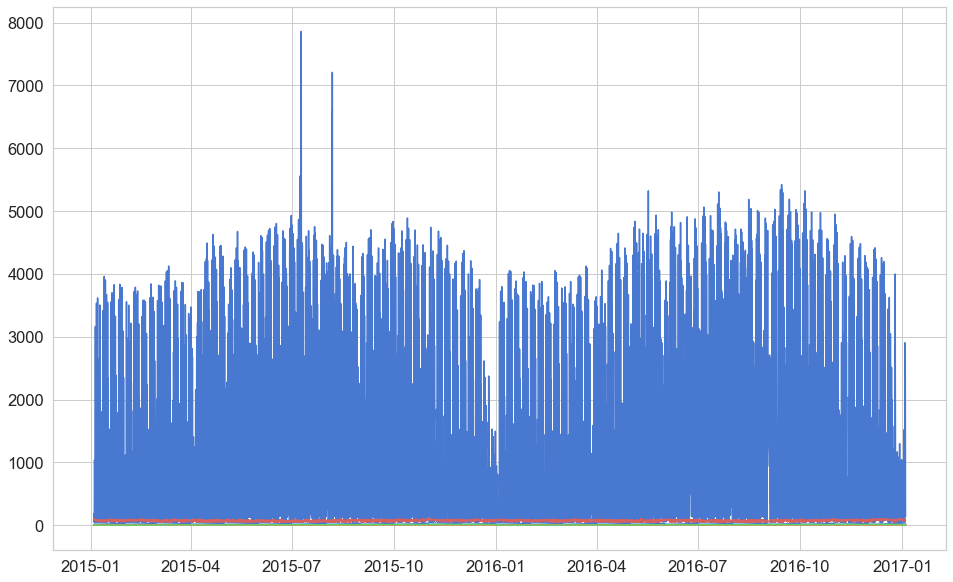

In [14]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.5)

rcParams["figure.figsize"] = 16, 10

plt.plot(df)

Text(0.5, 1.0, 'Monthly')

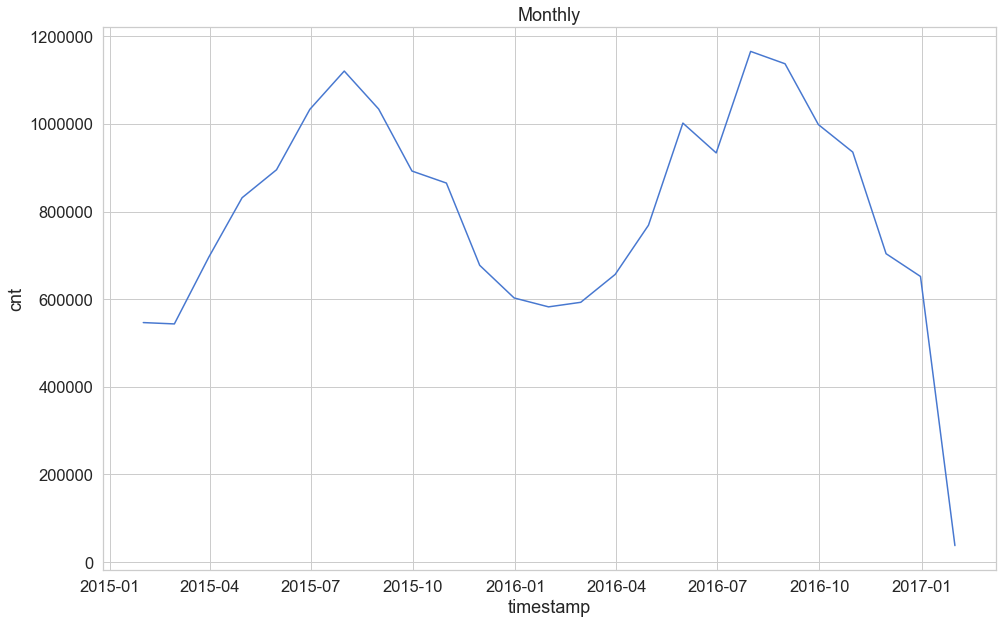

In [25]:
df_month = df.resample('M').sum()
sns.lineplot(x=df_month.index, y="cnt", data=df_month).set_title("Monthly")

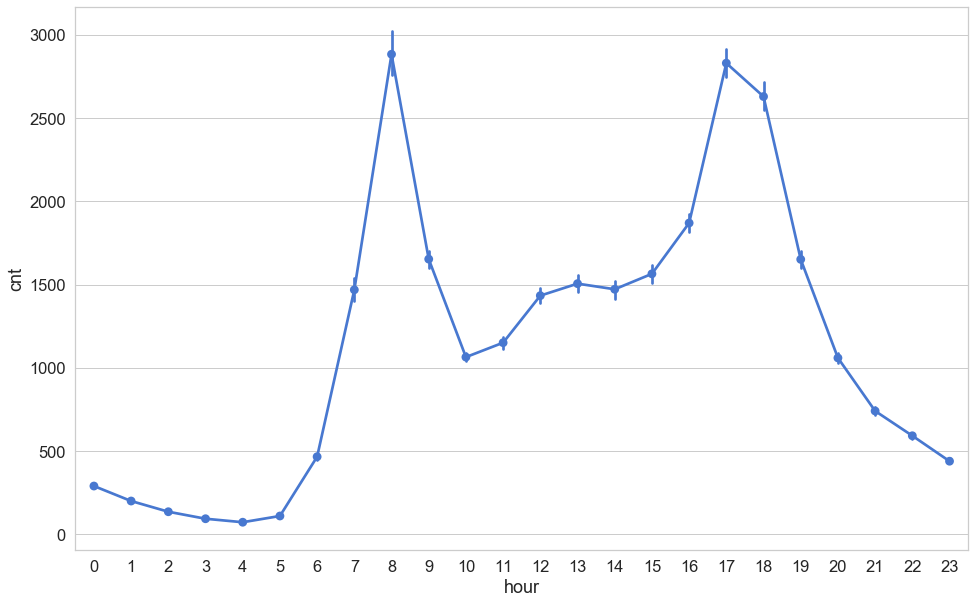

In [31]:
sns.pointplot(data=df, x="hour", y="cnt")

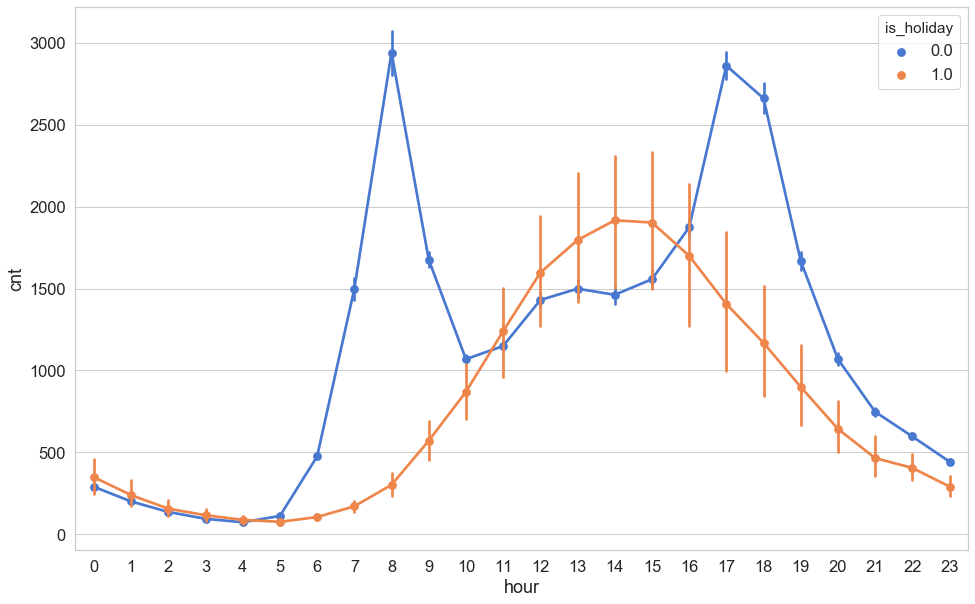

In [32]:
sns.pointplot(data=df, x="hour", hue="is_holiday", y="cnt")

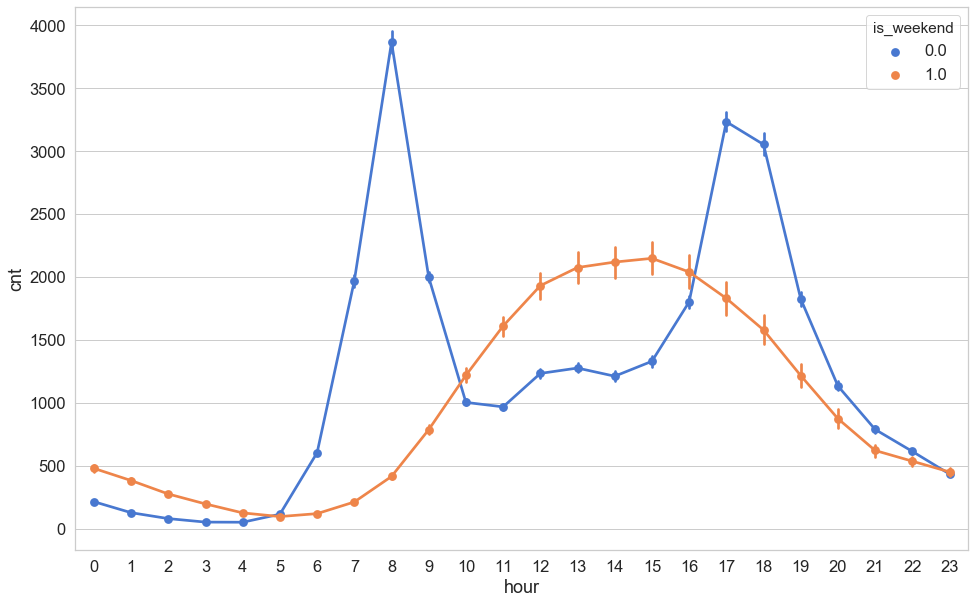

In [33]:
sns.pointplot(data=df, x="hour", hue="is_weekend", y="cnt")

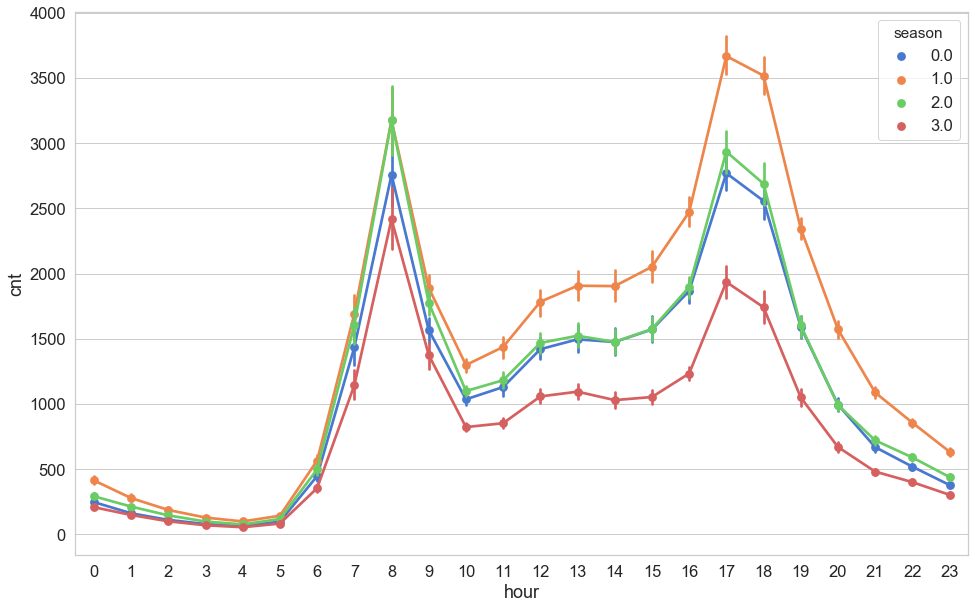

In [34]:
sns.pointplot(data=df, x="hour", hue="season", y="cnt")